In [19]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 

  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to c:\users\lucia\appdata\local\temp\pip-req-build-4lo5s5ai
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit 8b4cb652cdbe7ea20784efd596eaf9a144f6e1aa
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 'C:\Users\lucia\AppData\Local\Temp\pip-req-build-4lo5s5ai'


In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp 

En este desafío entrenaremos un discrimonador cuántico para el conocido __"Iris Flowers"__ dataset. Este fue introducido por el estadístico y biólogo __Ronald A. Fisher__ en 1936 en su trabajo "The use of multiple measurements in taxonomic problems", sobre análisis discriminante lineal. Este conjunto contiene información sobre tres especies de flores de Iris: iris setosa, iris versicolor y viris virginica. El conjunto contiene 150 muestras, 50 por cada especie, con las siguientes características:

1. Largo del sépalo.
2. Ancho del sépalo.
3. Largo del pétalo.
4. Ancho del pétalo.

Para aquellos que no sepan, el sépalo es la estructura externa de la flor, tipicamente verde, que forma un cáliz en la base de la flor, mientras que los pétalos son las estructuras internas, usualmente coloridos, que forman la corola de la flor. 

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC_iris_flower.png?raw=true)

Las siguientes celdas cargan los datos y los separa en datos de entrenamiento ```(X_train, Y_train)``` y datos de test ```(X_test, Y_test)```.

In [21]:
link = 'https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_2025_testing/refs/heads/main/ECC2025/IRIS.csv'
data = pd.read_csv( link,  low_memory=False ) 
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data    = data.sample( frac = 1, random_state=0 )
X_train = data[ ["sepal_length","sepal_width",
                    "petal_length","petal_width"]  
                    ].to_numpy()
X_test  = X_train[:50,:]
X_train = X_train[50:,:] 
Y_train = data["species"]
Y_train = Y_train.replace('Iris-setosa', 0)
Y_train = Y_train.replace('Iris-versicolor', 1)
Y_train = Y_train.replace('Iris-virginica', 2).to_numpy()
Y_test  = Y_train[:50]
Y_train = Y_train[50:]

C:\Users\lucia\AppData\Local\Temp\ipykernel_6556\952974279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_train = Y_train.replace('Iris-virginica', 2).to_numpy()


In [23]:
data 

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...
9,4.9,3.1,1.5,0.1,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
117,7.7,3.8,6.7,2.2,Iris-virginica


__Desafio:__ Construya un circuito parametrico de 4 qubits para cargar los datos al computador cuántico. Este circuito cuántico debe componerse solamente de puertas ``h``, ``rz``, y ``cx``, y tener 4 parámetros.

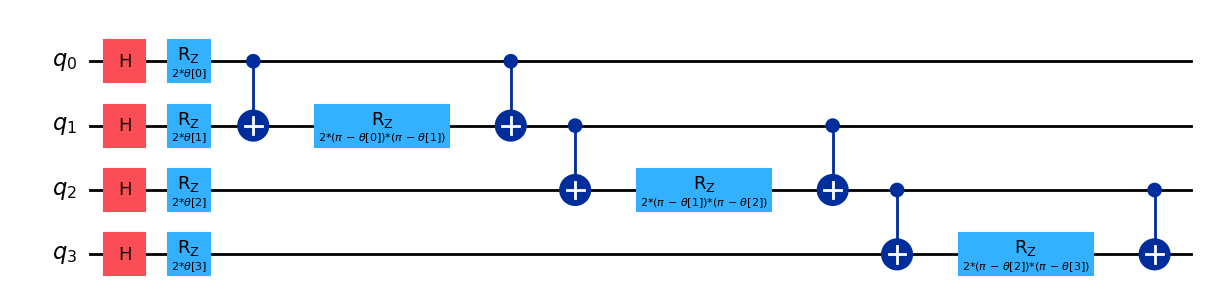

In [24]:
from qiskit.circuit import ParameterVector

qc_dato = QuantumCircuit(4)

#### Escribe tu solución acá
theta = ParameterVector(r'$\theta$',4)
qc_dato.h(range(4))
for j in range(4):
    qc_dato.rz( 2*theta[j], j )
for j in range(3):
    qc_dato.cx(j,j+1)
    qc_dato.rz( 2*(np.pi-theta[j])*(np.pi-theta[j+1]), j+1 )
    qc_dato.cx(j,j+1)
###

qc_dato.draw('mpl')

In [25]:
def test_7a(qc_dato):
    sol = True
    if qc_dato.num_qubits == 4 :
        pass
    else:
        print('Tu circuito no tiene parametros.')
        sol = False 
    if qc_dato.num_parameters == 0 :
        print('Tu circuito no tiene parametros.')
        sol = False 
    elif qc_dato.num_parameters > 4:
        print('Tu circuito tiene muchos parametros')
        sol = False 

    for op in qc_dato.count_ops().keys():
        if op in [ 'h', 'rz', 'cx' ]:
            pass
        else:
            print('Estas usando una puerta no permitida.')

    if sol:
        print('Tu circuito es correcto')

In [26]:
test_7a(qc_dato)

Tu circuito es correcto


__Desafio:__ Para evaluar los elementos del kernel cuántico utilizaremos el __swap test__. Esta es una técnica que permite obtener la fidelidad entre dos estados cuántico $|\psi\rangle$ y $|\phi\rangle$. Esta se basa en preparar los dos estados en conjutos de qubits diferentes, y luego conectarlos mediantes puertas ``cswap`` a un qubit auxiliar, tal como muestra la figura. Medir $\sigma_z$ en el qubit auxiliar nos permite obtener la fidelidad entre ambos estados. 

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC2025_swap_test.png?raw=true)

Evalue la fidelidad entre dos datos para el estado que construyo en el desafío anterior con el swap test.

In [35]:
def kernel_element( dato_1, dato_2,
                    backend=Estimator(options={'seed':1}), shots=1000  ):

    value = 0 # resultado por defecto, ustede debe remplazalo
    qc_swap_test = QuantumCircuit( 9 )
    
    ## Escribe tu solución acá
    qc_dato_1 = qc_dato.copy().assign_parameters( dato_1/10 )
    qc_dato_2 = qc_dato.copy().assign_parameters( dato_2/10 )

    qc_swap_test.compose( qc_dato_1, qubits=range(1,5), inplace=True )
    qc_swap_test.compose( qc_dato_2, qubits=range(5,9), inplace=True )

    qc_swap_test.barrier()
    qc_swap_test.h(0)
    for j in range(4):
        qc_swap_test.cswap(0,j+1,j+5)
    qc_swap_test.h(0)

    job    = backend.run(qc_swap_test, 
                            SparsePauliOp(['IIIIIIIIZ'],[1]),  
                            shots=shots) 
    value = job.result().values.squeeze()
    ##

    return qc_swap_test, value

C:\Users\lucia\AppData\Local\Temp\ipykernel_6556\1522234847.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000  ):


0.9999999999999998


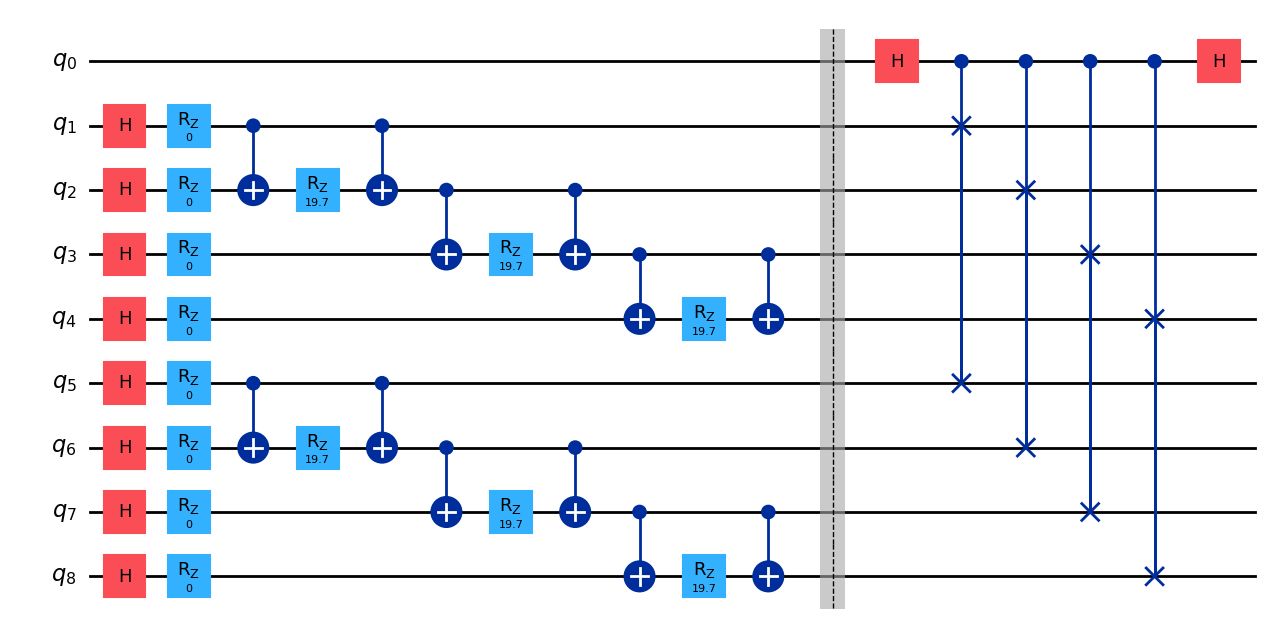

In [36]:
qc_swap_test, value = kernel_element( np.zeros(4), np.zeros(4) )
print( value )
qc_swap_test.draw('mpl') 

In [37]:
## test pendiente...

La siguiente celdas calculan y muestran el kernel cuántico.

In [38]:
def Quantum_Kernel( X_train, X_test=None, 
                    backend=Estimator(options={'seed':1}), shots=1000 ):
    """ 
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K_q     : Kernel cuantico
    backend : simulador o computador cuantico
    shots   : numero de shots     
    """

    if X_test is None: 
        X_test = X_train 
    X_train = np.array(X_train) 
    X_test  = np.array(X_test) 

    K_q = np.zeros(( X_test.shape[0], X_train.shape[0])) 

    values = [] 
    for x_test in X_test: 
        for x_train in X_train: 
            values.append( kernel_element( x_train, x_test, 
                                            backend=backend, shots=shots )[1]  ) 

    l = 0
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K_q[j,k] = values[l]
            l += 1

    return K_q

C:\Users\lucia\AppData\Local\Temp\ipykernel_6556\3321339570.py:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000 ):


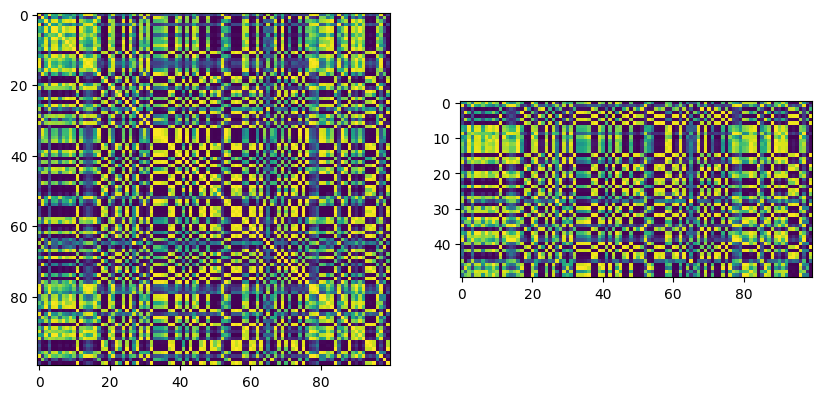

In [39]:
Kq_train = Quantum_Kernel( X_train ) 
Kq_test  = Quantum_Kernel( X_train, X_test ) 

fig, ax = plt.subplots( 1, 2, figsize=(10,5) ) 
ax[0].imshow( Kq_train ) 
ax[1].imshow( Kq_test ) 

In [40]:
np.mean( Kq_train ), np.mean( Kq_test )

(np.float64(0.41816988550312606), np.float64(0.4364620873394474))

__Desafio:__ Muestre un discriminador que que alcance una calidad superior a $0.95$. Puede volver a los desafios anteriores y modificarlos para intentar mejorar sus resultados. 

In [41]:
def test_7c( Kq_train, Y_train, Kq_test, Y_test ):
    svm = SVC( kernel = 'precomputed' ) 
    svm.fit( Kq_train, Y_train ) 
    Y_pred_quantum = svm.predict( Kq_test ) 
    print( 'Datos de entrenamiento:', Y_test ) 
    print( 'Predicción:            ', Y_pred_quantum ) 
    # print( 'Fidelidad train:       ', svm.score( Kq_train, Y_train ) ) 
    print( 'Fidelidad test:        ', svm.score( Kq_test, Y_test ) )  
    if svm.score( Kq_test, Y_test ) > 0.97:
        print('Tu discrimindor alcanza una calidad superior al 95%.')
    else:
        print('Vuelve a los desafios anteriores para intentar mejorar tu discriminador.')

In [42]:
test_7c( Kq_train, Y_train, Kq_test, Y_test )

Datos de entrenamiento: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
Predicción:             [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2]
Fidelidad test:         0.98
Tu discrimindor alcanza una calidad superior al 95%.
